In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)

In [17]:
preprocessed_df.head()

,Hostname,Application,Utilization(bps),Timestamp
0,vdevice-host-name,dns,105.000,2019-01-18 08:55:00
1,vdevice-host-name,tcp,0.000,2019-01-18 08:55:00
2,vdevice-host-name,https,2777.375,2019-01-18 08:55:00
3,vdevice-host-name,google_gen,0.000,2019-01-18 08:55:00
4,vdevice-host-name,firefox_update,0.000,2019-01-18 08:55:00


In [18]:
df_app=preprocessed_df.loc[preprocessed_df['Application']=='dns']

df_app=df_app[['Timestamp','Utilization(bps)']]

In [19]:
df_app.head()

,Timestamp,Utilization(bps)
0,2019-01-18 08:55:00,105.0
9,2019-01-18 09:00:00,212.5
20,2019-01-18 09:05:00,105.0
21,2019-01-18 09:10:00,340.0
34,2019-01-18 09:15:00,142.5


In [7]:
#val=[105.0,212.5,105.0, 340.0,142.5,150,250,70]

In [8]:
# sma4=val[0:3]
# sma=0
# counter=0
# for i in range(3,len(val)):

    

#     sma=sum(val[counter:i+1])/4
#     counter+=1
#     print(i," ",sma," ",counter)
#     sma4.append(sma)

In [9]:
#sma4=[]

In [20]:
df_app['SMA3']=df_app.iloc[:,1].rolling(window=3).mean()
df_app['SMA3'][0:3]=df_app['Utilization(bps)'][0:3]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
df_app['EMA3'] = pd.ewma(df_app["Utilization(bps)"], span=3,min_periods=3)
df_app['EMA3'][0:2]=df_app['Utilization(bps)'][0:2]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=3,span=3,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
df_app['SMA7']=df_app.iloc[:,1].rolling(window=7).mean()
df_app['SMA7'][0:6]=df_app['Utilization(bps)'][0:6]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [249]:
#simple_moving_average_9(df_app['Utilization(bps)'])

In [23]:
df_app['EMA7'] = pd.ewma(df_app["Utilization(bps)"], span=7,min_periods=7)
df_app['EMA7'][0:6]=df_app['Utilization(bps)'][0:6]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=7,span=7,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [251]:
cum_sum=df_app['Utilization(bps)'].tolist()

In [252]:
cum_sum=np.cumsum(cum_sum)

In [253]:
df_app['cum_sum']=cum_sum

In [24]:
df_app.head(10)

,Timestamp,Utilization(bps),SMA3,EMA3,SMA7,EMA7
0,2019-01-18 08:55:00,105.000,105.000000,105.000000,105.000000,105.000000
9,2019-01-18 09:00:00,212.500,212.500000,212.500000,212.500000,212.500000
20,2019-01-18 09:05:00,105.000,105.000000,135.714286,105.000000,105.000000
21,2019-01-18 09:10:00,340.000,219.166667,244.666667,340.000000,340.000000
34,2019-01-18 09:15:00,142.500,195.833333,191.935484,142.500000,142.500000
36,2019-01-18 09:20:00,157.500,213.333333,174.444444,157.500000,157.500000
43,2019-01-18 09:25:00,521.625,273.875000,349.401575,226.303571,278.610340
53,2019-01-18 09:30:00,163.250,280.791667,255.960784,234.625000,246.561780
57,2019-01-18 09:35:00,154.250,279.708333,205.005871,226.303571,221.610366
63,2019-01-18 09:40:00,398.500,238.666667,301.847507,268.232143,268.471701


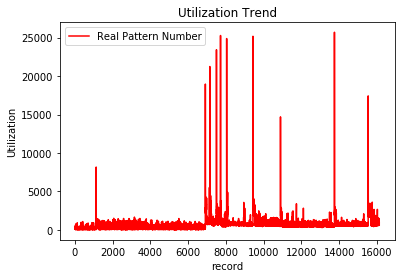

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
utilization=df_app.iloc[:, 1:2].values

plt.plot(utilization, color = 'red', label = 'Real Pattern Number')


plt.title('Utilization Trend')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

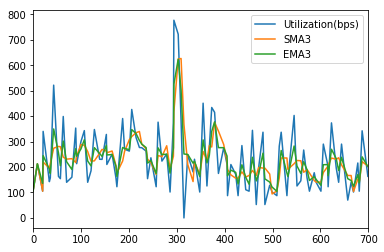

In [27]:
temp=df_app[['Utilization(bps)','SMA3','EMA3']][0:100]
temp.plot()


In [28]:
df_app.to_csv('Data/dns_sma3_ema7.csv',index=False)